In [21]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import time

"""def draw_line(img, x0, y0, x1, y1, color):
    steep = abs(y1 - y0) > abs(x1 - x0)
    if steep:
        x0, y0 = y0, x0
        x1, y1 = y1, x1

    if x0 > x1:
        x0, x1 = x1, x0
        y0, y1 = y1, y0

    dx = x1 - x0
    dy = y1 - y0
    gradient = dy / dx if dx != 0 else 1

    # handle first endpoint
    xend = round(x0)
    yend = y0 + gradient * (xend - x0)
    xgap = 1 - ((x0 + 0.5) % 1)
    xpxl1 = xend
    ypxl1 = int(yend)
    if steep:
        img[ypxl1, xpxl1] = color * xgap * (1 - (yend % 1))
        img[ypxl1+1, xpxl1] = color * xgap * (yend % 1)
    else:
        img[xpxl1, ypxl1] = color * xgap * (1 - (yend % 1))
        img[xpxl1, ypxl1+1] = color * xgap * (yend % 1)
    intery = yend + gradient

    # handle second endpoint
    xend = round(x1)
    yend = y1 + gradient * (xend - x1)
    xgap = (x1 + 0.5) % 1
    xpxl2 = xend
    ypxl2 = int(yend)
    if steep:
        img[ypxl2, xpxl2] = color * xgap * (1 - (yend % 1))
        img[ypxl2+1, xpxl2] = color * xgap * (yend % 1)
    else:
        img[xpxl2, ypxl2] = color * xgap * (1 - (yend % 1))
        img[xpxl2, ypxl2+1] = color * xgap * (yend % 1)

    # main loop
    for x in range(int(xpxl1 + 1), int(xpxl2)):
        if steep:
            img[int(intery), x] = color * (1 - (intery % 1))
            img[int(intery)+1, x] = color * (intery % 1)
        else:
            img[x, int(intery)] = color * (1 - (intery % 1))
            img[x, int(intery)+1] = color * (intery % 1)
        intery += gradient

img = np.zeros((1200, 1200))
for i in range(1000):
    draw_line(img, 13, 20, 1100, 500, 1)
Image.fromarray((img * 255).astype(np.uint8)).show()
"""

'def draw_line(img, x0, y0, x1, y1, color):\n    steep = abs(y1 - y0) > abs(x1 - x0)\n    if steep:\n        x0, y0 = y0, x0\n        x1, y1 = y1, x1\n\n    if x0 > x1:\n        x0, x1 = x1, x0\n        y0, y1 = y1, y0\n\n    dx = x1 - x0\n    dy = y1 - y0\n    gradient = dy / dx if dx != 0 else 1\n\n    # handle first endpoint\n    xend = round(x0)\n    yend = y0 + gradient * (xend - x0)\n    xgap = 1 - ((x0 + 0.5) % 1)\n    xpxl1 = xend\n    ypxl1 = int(yend)\n    if steep:\n        img[ypxl1, xpxl1] = color * xgap * (1 - (yend % 1))\n        img[ypxl1+1, xpxl1] = color * xgap * (yend % 1)\n    else:\n        img[xpxl1, ypxl1] = color * xgap * (1 - (yend % 1))\n        img[xpxl1, ypxl1+1] = color * xgap * (yend % 1)\n    intery = yend + gradient\n\n    # handle second endpoint\n    xend = round(x1)\n    yend = y1 + gradient * (xend - x1)\n    xgap = (x1 + 0.5) % 1\n    xpxl2 = xend\n    ypxl2 = int(yend)\n    if steep:\n        img[ypxl2, xpxl2] = color * xgap * (1 - (yend % 1))\n   

In [22]:
def draw_line(x0, y0, x1, y1, color, multiplier):
    img = {}
    steep = abs(y1 - y0) > abs(x1 - x0)
    if steep:
        x0, y0 = y0, x0
        x1, y1 = y1, x1

    if x0 > x1:
        x0, x1 = x1, x0
        y0, y1 = y1, y0

    dx = x1 - x0
    dy = y1 - y0
    gradient = dy / dx if dx != 0 else 1

    # handle first endpoint
    xend = round(x0)
    yend = y0 + gradient * (xend - x0)
    xgap = 1 - ((x0 + 0.5) % 1)
    xpxl1 = xend
    ypxl1 = int(yend)
    if steep:
        img[(ypxl1, xpxl1)] = color * xgap * (1 - (yend % 1)) * multiplier
        img[(ypxl1+1, xpxl1)] = color * xgap * (yend % 1) * multiplier
    else:
        img[(xpxl1, ypxl1)] = color * xgap * (1 - (yend % 1)) * multiplier
        img[(xpxl1, ypxl1+1)] = color * xgap * (yend % 1) * multiplier
    intery = yend + gradient

    # handle second endpoint
    xend = round(x1)
    yend = y1 + gradient * (xend - x1)
    xgap = (x1 + 0.5) % 1
    xpxl2 = xend
    ypxl2 = int(yend)
    if steep:
        img[(ypxl2, xpxl2)] = color * xgap * (1 - (yend % 1)) * multiplier
        img[(ypxl2+1, xpxl2)] = color * xgap * (yend % 1) * multiplier
    else:
        img[(xpxl2, ypxl2)] = color * xgap * (1 - (yend % 1)) * multiplier
        img[(xpxl2, ypxl2+1)] = color * xgap * (yend % 1) * multiplier

    # main loop
    for x in range(int(xpxl1 + 1), int(xpxl2)):
        if steep:
            img[(int(intery), x)] = color * (1 - (intery % 1)) * multiplier
            img[(int(intery)+1, x)] = color * (intery % 1) * multiplier
        else:
            img[(x, int(intery))] = color * (1 - (intery % 1)) * multiplier
            img[(x, int(intery)+1)] = color * (intery % 1) * multiplier
        intery += gradient
    return img


In [23]:
"""def draw_line(x0, y0, x1, y1, color, multiplier):
    img = {}
    steep = abs(y1 - y0) > abs(x1 - x0)
    if steep:
        x0, y0 = y0, x0
        x1, y1 = y1, x1

    if x0 > x1:
        x0, x1 = x1, x0
        y0, y1 = y1, y0

    dx = x1 - x0
    dy = y1 - y0
    gradient = dy / dx if dx != 0 else 1

    # handle first endpoint
    xend = round(x0)
    yend = y0 + gradient * (xend - x0)
    xgap = 1 - ((x0 + 0.5) % 1)
    xpxl1 = xend
    ypxl1 = int(yend)
    if steep:
        img[(ypxl1, xpxl1)] = (1 - color * xgap * (1 - (yend % 1))) * multiplier
        img[(ypxl1+1, xpxl1)] = (1 - color * xgap * (yend % 1)) * multiplier
    else:
        img[(xpxl1, ypxl1)] = (1 - color * xgap * (1 - (yend % 1))) * multiplier
        img[(xpxl1, ypxl1+1)] = (1 - color * xgap * (yend % 1)) * multiplier
    intery = yend + gradient

    # handle second endpoint
    xend = round(x1)
    yend = y1 + gradient * (xend - x1)
    xgap = (x1 + 0.5) % 1
    xpxl2 = xend
    ypxl2 = int(yend)
    if steep:
        img[(ypxl2, xpxl2)] = (1 - color * xgap * (1 - (yend % 1))) * multiplier
        img[(ypxl2+1, xpxl2)] = (1 - color * xgap * (yend % 1)) * multiplier
    else:
        img[(xpxl2, ypxl2)] = (1 - color * xgap * (1 - (yend % 1))) * multiplier
        img[(xpxl2, ypxl2+1)] = (1 - color * xgap * (yend % 1)) * multiplier

    # main loop
    for x in range(int(xpxl1 + 1), int(xpxl2)):
        if steep:
            img[(int(intery), x)] = (1 - color * (1 - (intery % 1))) * multiplier
            img[(int(intery)+1, x)] = (1 - color * (intery % 1)) * multiplier
        else:
            img[(x, int(intery))] = (1 - color * (1 - (intery % 1))) * multiplier
            img[(x, int(intery)+1)] = (1 - color * (intery % 1)) * multiplier
        intery += gradient

    return img

# Test the function
arr = []
for i in range(1000):
    #arr = np.append(arr, draw_line(13, 20, 80, 40, 1))
    arr.append(draw_line(13, 20, 1100, 500, 1, 0.2))

print(len(arr))
print(arr[0])
"""

'def draw_line(x0, y0, x1, y1, color, multiplier):\n    img = {}\n    steep = abs(y1 - y0) > abs(x1 - x0)\n    if steep:\n        x0, y0 = y0, x0\n        x1, y1 = y1, x1\n\n    if x0 > x1:\n        x0, x1 = x1, x0\n        y0, y1 = y1, y0\n\n    dx = x1 - x0\n    dy = y1 - y0\n    gradient = dy / dx if dx != 0 else 1\n\n    # handle first endpoint\n    xend = round(x0)\n    yend = y0 + gradient * (xend - x0)\n    xgap = 1 - ((x0 + 0.5) % 1)\n    xpxl1 = xend\n    ypxl1 = int(yend)\n    if steep:\n        img[(ypxl1, xpxl1)] = (1 - color * xgap * (1 - (yend % 1))) * multiplier\n        img[(ypxl1+1, xpxl1)] = (1 - color * xgap * (yend % 1)) * multiplier\n    else:\n        img[(xpxl1, ypxl1)] = (1 - color * xgap * (1 - (yend % 1))) * multiplier\n        img[(xpxl1, ypxl1+1)] = (1 - color * xgap * (yend % 1)) * multiplier\n    intery = yend + gradient\n\n    # handle second endpoint\n    xend = round(x1)\n    yend = y1 + gradient * (xend - x1)\n    xgap = (x1 + 0.5) % 1\n    xpxl2 = xen

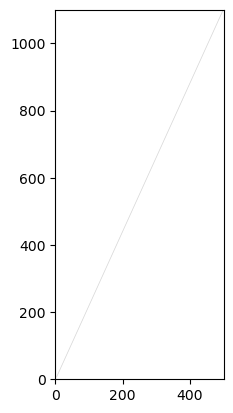

In [24]:
def show_line(line_pixels):
    # Get the maximum coordinates to determine image size
    max_x = max(pixel[0] for pixel in line_pixels.keys())
    max_y = max(pixel[1] for pixel in line_pixels.keys())
    
    # Create an empty image
    img = np.zeros((max_x + 1, max_y + 1))
    
    # Set the pixel values
    for pixel, value in line_pixels.items():
        img[pixel] = value

    # Display the image
    plt.imshow(img, cmap='gray_r', origin='lower', vmin=0, vmax=1)
    plt.show()

# Test the function
line_pixels = draw_line(5, 4, 1100, 500, 1, 0.4)
show_line(line_pixels)